In [57]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [58]:
data= pd.read_csv("/content/clustering - Sheet1.csv")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GDP per Capita         100 non-null    float64
 1   Life Expectancy        100 non-null    float64
 2   Literacy Rate          100 non-null    float64
 3   Unemployment Rate      100 non-null    float64
 4   Access to Clean Water  100 non-null    float64
 5   Poverty Rate           100 non-null    float64
 6   Country                100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [60]:
data.describe()

,GDP per Capita,Life Expectancy,Literacy Rate,Unemployment Rate,Access to Clean Water,Poverty Rate
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2499.546730,64.747678,77.746925,13.287461,77.815276,23.413789
std,809.626188,9.149988,11.245180,5.869658,10.642503,10.504556
min,1020.218000,50.187900,60.201080,5.039421,60.691670,5.360338
25%,1797.300500,56.442397,67.103633,8.397232,68.378357,13.951227
50%,2495.138000,64.441300,78.232965,11.782680,77.274045,26.099410
75%,3139.029750,72.760908,87.957125,18.253077,87.927922,32.024588
max,3990.345000,79.920110,94.944010,24.621890,94.805800,39.443720


<Axes: xlabel='Life Expectancy', ylabel='Unemployment Rate'>

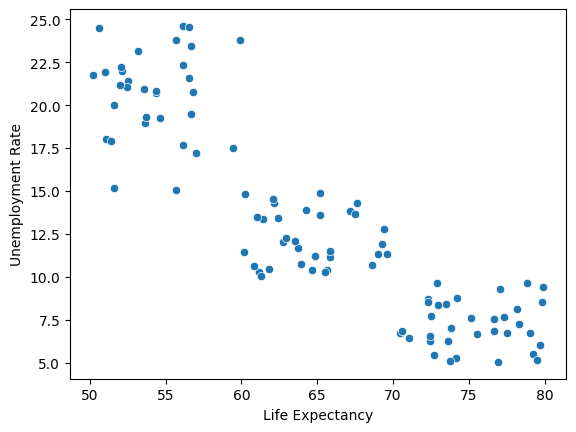

In [61]:
sns.scatterplot(x=data["Life Expectancy"],y=data["Unemployment Rate"])


In [62]:
from sklearn.cluster import KMeans


In [63]:
km=KMeans(n_clusters=3,random_state=42)

In [64]:
numeric_data=data.select_dtypes("number")

In [65]:
from sklearn.preprocessing import StandardScaler
s_scalar=StandardScaler()
data_upd=s_scalar.fit_transform(numeric_data)

In [66]:
clu=km.fit_predict(data_upd)
clu

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [67]:
data["Clusters"]=clu
data

,GDP per Capita,Life Expectancy,Literacy Rate,Unemployment Rate,Access to Clean Water,Poverty Rate,Country,Clusters
0,1548.814,55.68434,68.20993,15.046950,61.35474,38.558030,Country 1,2
1,1715.189,50.18790,60.97101,21.778170,62.98282,30.117140,Country 2,2
2,1602.763,56.17635,68.37945,17.700080,65.69965,33.599780,Country 3,2
3,1544.883,56.12096,60.96098,22.351940,65.90873,37.299910,Country 4,2
4,1423.655,56.16934,69.76459,24.621890,65.74325,31.716300,Country 5,2
...,...,...,...,...,...,...,...,...
95,3490.305,78.81720,89.06733,9.610557,86.33461,14.979620,Country 96,1
96,3989.410,72.72437,90.52078,5.447473,94.80580,8.621891,Country 97,1
97,3065.304,73.79057,87.71653,7.029712,93.71786,9.706489,Country 98,1
98,3783.234,73.74296,89.55444,5.121566,90.02721,8.782452,Country 99,1


<Axes: xlabel='Life Expectancy', ylabel='Unemployment Rate'>

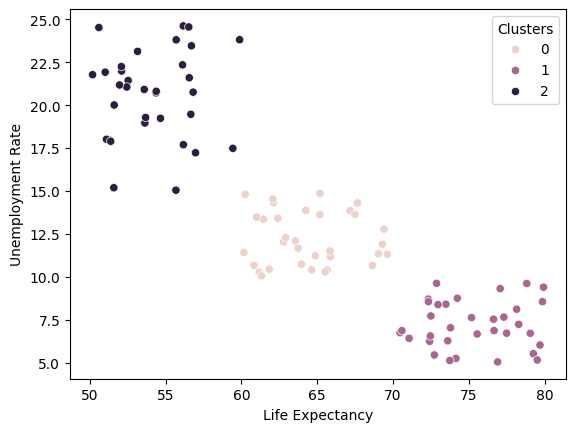

In [68]:
sns.scatterplot(x=data["Life Expectancy"],y=data["Unemployment Rate"],hue=data["Clusters"])


In [84]:
coun=data[data["Clusters"]==2]#only cluster 2 data
coun["Country"].unique()

array(['Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5',
       'Country 6', 'Country 7', 'Country 8', 'Country 9', 'Country 10',
       'Country 11', 'Country 12', 'Country 13', 'Country 14',
       'Country 15', 'Country 16', 'Country 17', 'Country 18',
       'Country 19', 'Country 20', 'Country 21', 'Country 22',
       'Country 23', 'Country 24', 'Country 25', 'Country 26',
       'Country 27', 'Country 28', 'Country 29', 'Country 30',
       'Country 31', 'Country 32', 'Country 33'], dtype=object)

In [77]:
# Profile each cluster
cluster_profile = data.groupby('Clusters').mean(numeric_only=True)
cluster_profile

,GDP per Capita,Life Expectancy,Literacy Rate,Unemployment Rate,Access to Clean Water,Poverty Rate
Clusters,,,,,,
0,2493.895061,64.452078,78.031502,12.203360,76.961105,25.848923
1,3403.752559,75.323386,90.383698,7.228377,90.325159,10.329008
2,1573.592394,54.147095,64.442644,20.614254,65.780478,34.459944
